Import Datasets 

In [2]:
from sklearn.datasets import load_boston 
data = load_boston()

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
X = data.data
Y = data.target


Train - Test Split 

In [6]:
from sklearn.model_selection import train_test_split
Xtrn,Xtst,Ytrn,Ytst = train_test_split(X,Y,train_size = 0.9 , random_state = 10)

In [8]:
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)

(455, 13)
(455,)
(51, 13)
(51,)


Select the value of k 

In [11]:
import numpy as np 
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
rmse_val = [] # to store rmse values for different k 
for K in range(40):
  K = K + 1
  model = KNeighborsRegressor(n_neighbors = K)
  model.fit(Xtrn,Ytrn) # fit the model 
  pred = model.predict(Xtst) # make prediction on test set 
  error = np.sqrt(metrics.mean_squared_error(Ytst,pred)) # calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSE value for k =',K,'is:' ,error)
    


RMSE value for k = 1 is: 7.831096885582028
RMSE value for k = 2 is: 8.212523315990419
RMSE value for k = 3 is: 6.889823887634167
RMSE value for k = 4 is: 6.748836137860088
RMSE value for k = 5 is: 6.555881658001881
RMSE value for k = 6 is: 6.678795747450702
RMSE value for k = 7 is: 6.7819916074900615
RMSE value for k = 8 is: 6.969207483005255
RMSE value for k = 9 is: 7.12419513900348
RMSE value for k = 10 is: 7.141672649687474
RMSE value for k = 11 is: 7.146324440297669
RMSE value for k = 12 is: 7.233379830277348
RMSE value for k = 13 is: 7.446423791898266
RMSE value for k = 14 is: 7.5706126350691125
RMSE value for k = 15 is: 7.789130575348297
RMSE value for k = 16 is: 7.948984714812548
RMSE value for k = 17 is: 8.063445201496597
RMSE value for k = 18 is: 8.12025907714951
RMSE value for k = 19 is: 8.117561200749705
RMSE value for k = 20 is: 8.236210222154932
RMSE value for k = 21 is: 8.257759624461341
RMSE value for k = 22 is: 8.354768340708198
RMSE value for k = 23 is: 8.3327242670043

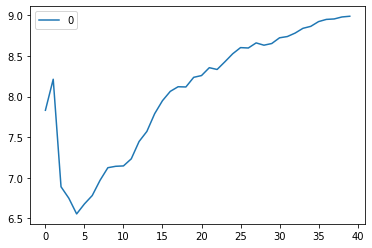

In [13]:
# plotting the rmse values against k values 
import pandas as pd 
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

Training KNN Regressor

In [14]:
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(Xtrn,Ytrn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Evaluation of model

In [15]:
Ypred = model.predict(Xtst)

In [16]:
print(Ypred)
print(Ytst)

[31.46 33.62 26.76 25.74 21.6  13.34 38.96 17.44 28.38 33.64 21.16 28.66
 35.72 27.46 28.94 39.32 24.56 32.24 23.32 21.5  27.64 17.82 20.14 21.66
 32.84 25.98 17.94 14.46 29.82 10.66 23.56 38.6  27.46 23.28 14.76 20.34
 12.12 34.42 22.3  25.14 24.78 20.94 16.54 33.   21.72 29.4  24.66 16.72
 30.84 17.42 28.72]
[28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7]


Mean Absolute Error

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
mean_absolute_error(Ypred,Ytst)

4.8921568627450975

Mean Squared Error

In [20]:
metrics.mean_squared_error(Ypred,Ytst)

42.97958431372549

Root Mean Squared Error

In [22]:
metrics.mean_squared_error(Ypred,Ytst)**.5

6.555881658001881

Score

In [24]:
scr = model.score(Xtst,Ytst)
print(scr)

0.5658766767101384


R2 Score

In [26]:
r2 = metrics.r2_score(Ytst,Ypred)

In [27]:
print(r2)

0.5658766767101384
